In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


> # EXPLORATORY DATA ANALYSIS (EDA)

In [2]:
data=pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


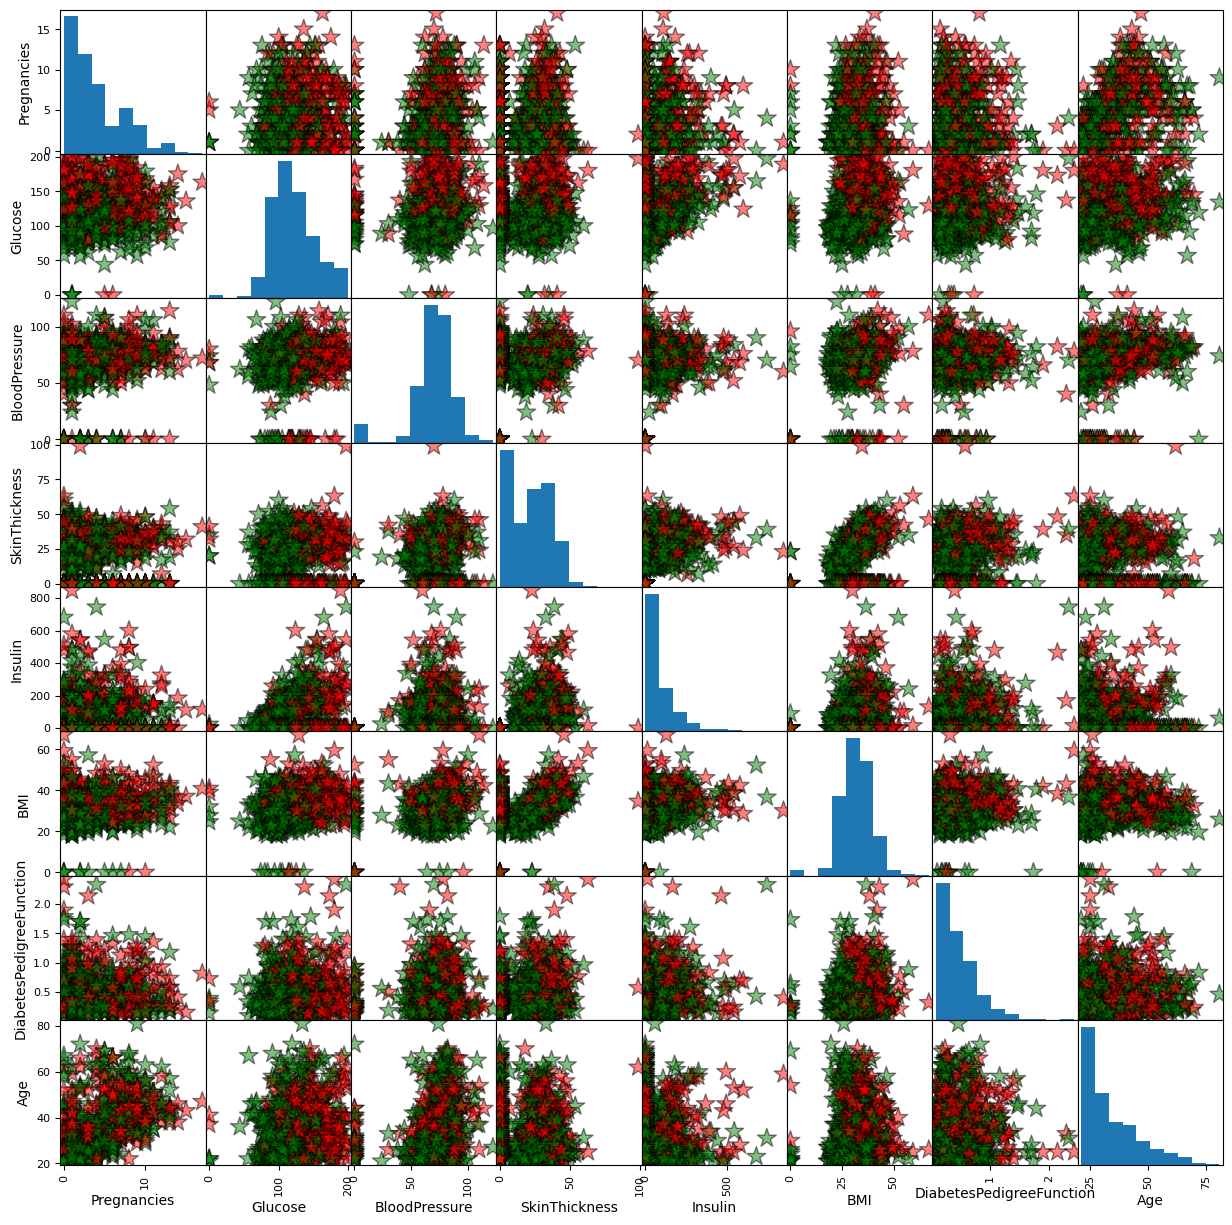

In [6]:
color_list = ['red' if i==1 else 'green' for i in data.loc[:,'Outcome']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'Outcome'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64

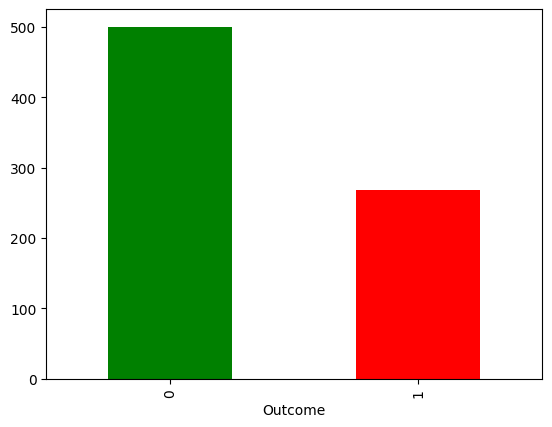

In [7]:
data["Outcome"].value_counts().plot.bar(color=["green","red"]);
data["Outcome"].value_counts()

In [8]:
columns=["Glucose", "BloodPressure", "SkinThickness", "Insulin","BMI", "DiabetesPedigreeFunction","Age"]
print(""" Most recurring values in columns\n""")
for col in columns:
   
    print(col,data[col].mode()[0],"\n***********************")


 Most recurring values ​​in columns

Glucose 99 
***********************
BloodPressure 70 
***********************
SkinThickness 0 
***********************
Insulin 0 
***********************
BMI 32.0 
***********************
DiabetesPedigreeFunction 0.254 
***********************
Age 22 
***********************


In [29]:
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
zero_list=[]

print("""Min/max values in columns\n""")

for col in columns:
   
    print("min:",col,data[col].min())
    print("max:",col,data[col].max(),"\n***********************")
    zero_list.append([col,data[col].min()])

Min/max values in columns

min: Pregnancies 0
max: Pregnancies 17 
***********************
min: Glucose 44
max: Glucose 199 
***********************
min: BloodPressure 24
max: BloodPressure 122 
***********************
min: SkinThickness 0
max: SkinThickness 99 
***********************
min: Insulin 0
max: Insulin 846 
***********************
min: BMI 18.2
max: BMI 67.1 
***********************
min: DiabetesPedigreeFunction 0.078
max: DiabetesPedigreeFunction 2.42 
***********************
min: Age 21
max: Age 81 
***********************


In [10]:
df=data.copy()

In [11]:
columns=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]


In [12]:
def zero(columns):
    for col in columns:
        if 0 in df[col].values:
            data[col].replace(0,data[col].mode().iloc[0],inplace=True)

            
def zero2(columns):
    for col in columns:
        if 0 in df[col].values:
            data[col].replace(0,data[col].mean(),inplace=True)

    
zero(columns)
#zero2(columns)

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.539062,30.490660,44.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,72.295573,12.106756,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# NORMALİZATİON

In [15]:
y=data["Outcome"].values
X_df=data.drop(["Outcome"],axis=1)

In [16]:
X= ( X_df - np.min(X_df) )  /  ( np.max(X_df) -  np.min(X_df) )  

In [17]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.007092,0.174941,0.085106,0.041371,0.000000,0.039716,0.000741,0.059102
1,0.001182,0.100473,0.078014,0.034279,0.000000,0.031442,0.000415,0.036643
2,0.009456,0.216312,0.075650,0.000000,0.000000,0.027541,0.000794,0.037825
3,0.001182,0.105201,0.078014,0.027187,0.111111,0.033215,0.000197,0.024823
4,0.000000,0.161939,0.047281,0.041371,0.198582,0.050946,0.002704,0.039007


> # K-NEAREST NEIGHBORS (KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=3)

knn.fit(X,y)

prediction=knn.predict(X)

print("Prediction Values: {}".format(prediction))

Prediction Values: [1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0
 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0

> # TRAİN TEST SPLİT AND MODEL SCORE

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

knn.fit(X_train,y_train)

predictionV2=knn.predict(X_test)

print("KNN (k=3) accuracy değeri:",knn.score(X_test,y_test))

KNN (k=3) accuracy değeri: 0.7337662337662337


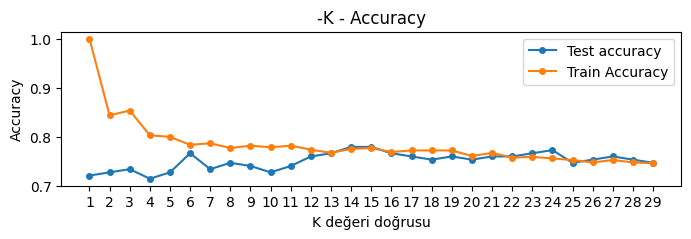

En iyi accuracy değeri 0.7792207792207793 K=13 değerinde


In [20]:
neig_values = np.arange(1, 30)
train_accuracy = []
test_accuracy = []


for i,k in enumerate(neig_values):
    
    knn= KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train,y_train)
    
    train_accuracy.append(knn.score(X_train, y_train))
    
    test_accuracy.append(knn.score(X_test, y_test))
    
    
plt.figure(figsize=[8,2])
plt.plot(neig_values, test_accuracy, label = 'Test accuracy', marker='.',markersize=8)
plt.plot(neig_values, train_accuracy, label = 'Train Accuracy', marker='.',markersize=8)
plt.legend()
plt.title('-K - Accuracy')
plt.xlabel('K değeri doğrusu')
plt.ylabel('Accuracy')
plt.xticks(neig_values)
plt.savefig('graph.png')
plt.show()
print("En iyi accuracy değeri {} K={} değerinde".format(np.max(test_accuracy), test_accuracy.index(np.max(test_accuracy)) ))

> # REGRESSION

In [21]:
data1= data[data["Outcome"]==1]

y_=data1.loc[:,"Insulin"].values.reshape(-1,1)
X_=data1.loc[:,"Glucose"].values.reshape(-1,1)

In [22]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


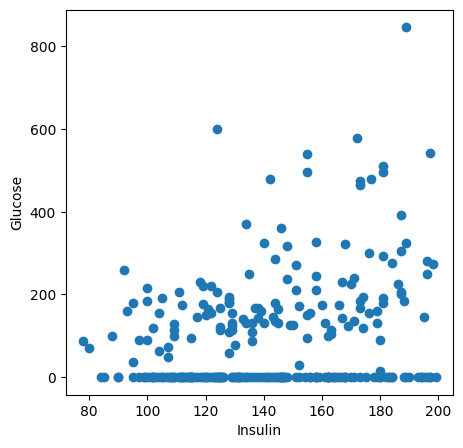

In [23]:
#scatter

plt.figure(figsize=[5,5])

plt.scatter(x=X_,y=y_)

plt.xlabel('Insulin')

plt.ylabel('Glucose')

plt.show()


> # LİNEAR REGRESSION

Lr score: 0.069065309835175


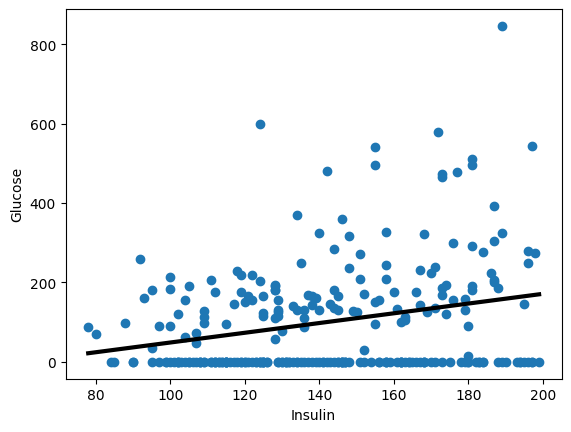

In [24]:
#lineer regression
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

#model train
lr.fit(X_,y_)

#predict shape
predict_shape=np.linspace(min(X_),max(X_)).reshape(-1,1)

#predict
prediction= lr.predict(predict_shape)

#lr score
print("Lr score: {}".format(lr.score(X_,y_)))

#plot and scatter
plt.plot(predict_shape, prediction, color='black', linewidth=3)
plt.scatter(x=X_,y=y_)
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.show()

> # CROSS VALIDATION

In [25]:
#CV 
from sklearn.model_selection import cross_val_score

lr=LinearRegression()

k=2

cv_result=cross_val_score(lr,X_,y_,cv=k)

print("Cv result:{}\nCv_result avarage:{}".format(cv_result,np.sum(cv_result)/k ))




Cv result:[0.06239799 0.07348643]
Cv_result avarage:0.06794220728081102


> # RİDGE

In [26]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test= train_test_split(X_,y_,test_size=0.2,random_state=3)

ridge=Ridge(alpha=0.1)
#model training
ridge.fit(X_train,y_train)
#predict 
predict=ridge.predict(X_test)

print("Ridge score:{}".format(ridge.score(X_test,y_test)))




Ridge score:-0.030854974274006075


> # CONFUSION MATRIX AND RANDOM FOREST REGRESSION

In [27]:
#confusin matrix with random forest

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
X,y=data.loc[:,data.columns != "Outcome"],data.loc[:,"Outcome"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=3)

# random forest

rf=RandomForestClassifier(random_state=5)


#training
rf.fit(X_train,y_train)

#predict value
y_pred = rf.predict(X_test)

#classification report
cr=classification_report(y_test,y_pred)

#confusion matrix
cm = confusion_matrix(y_test,y_pred)

print("classification report:\n{}\nConfusion matrix:\n {} ".format(cr,cm))
#print("Confusion matrix: {}".format(cm))
#print("classification report:\n",cr)


classification report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        92
           1       0.77      0.58      0.66        62

    accuracy                           0.76       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.76      0.76      0.75       154

Confusion matrix:
 [[81 11]
 [26 36]] 


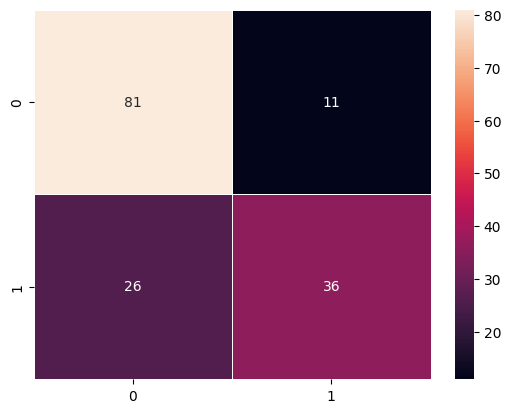

In [28]:
#  consufion matrix visualize
ax=sns.heatmap(cm,annot=True,fmt="d",linewidths=.5);


 **DATASET**: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset